# Logistic Regression : Social Network Ads

This dataset consist on information about individuals who have bought the product from an social network ad that was published.
This data gives us an insight about the impact of social network advertisement in the current world, also the idea of which group is beign more active with that and about what is the average earning of the people.

In [1]:
import os


import pandas as pd
pd.set_option('display.max_column',None)


import warnings
warnings.filterwarnings('ignore')


import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr


import sklearn
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv(r'D:\Uddhav\DATA SCIENCE\ML PROJECTS\Logistic regression\Subscription Purchased or not\Social_Network_ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Understanding The data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Data Exploration

In [6]:
df.Purchased

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [7]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<AxesSubplot:xlabel='Purchased', ylabel='count'>

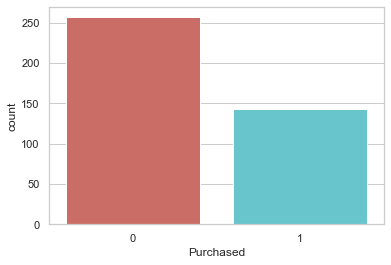

In [8]:
sns.countplot(df.Purchased, palette='hls')

## Calculating the % of Product bought.

In [9]:
count_not_bought = len(df['Purchased']==0)
count_bought = len(df['Purchased']==1)
per_of_no = count_not_bought/(count_not_bought+count_bought)
print('Product Not Bought: ', per_of_no*100)
per_of_yes = count_bought/(count_not_bought+count_bought)
print('Product Bought: ', per_of_yes*100)

Product Not Bought:  50.0
Product Bought:  50.0


The product bought & not bought has same count of people

In [10]:
df.groupby('Purchased').mean()

,User ID,Age,EstimatedSalary
Purchased,,,
0,1.569116e+07,32.793774,60544.747082
1,1.569222e+07,46.391608,86272.727273


1. We can observe that people with higher average age tends to buy the product more.
2. People with higher average salary tends to buy the product more.

## 1. Age

In [11]:
df.Age

0      19
1      35
2      26
3      27
4      19
       ..
395    46
396    51
397    50
398    36
399    49
Name: Age, Length: 400, dtype: int64

In [13]:
df.Age.value_counts()

35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

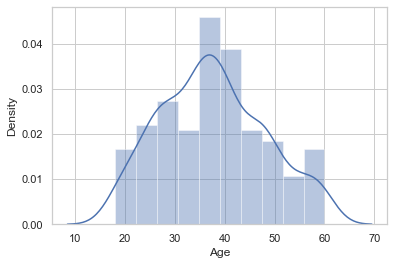

In [14]:
sns.distplot(df.Age)

<AxesSubplot:xlabel='Age'>

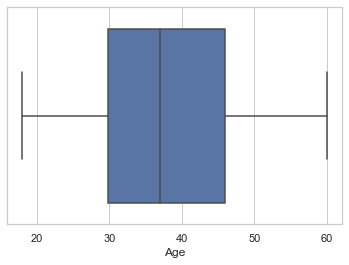

In [15]:
sns.boxplot(df.Age)

In [19]:
df.groupby('Age').mean()

,User ID,EstimatedSalary,Purchased
Age,,,
18,1.567696e+07,66400.000000,0.000000
19,1.571065e+07,46000.000000,0.000000
20,1.569884e+07,61714.285714,0.000000
21,1.565027e+07,61000.000000,0.000000
22,1.568825e+07,48800.000000,0.000000
23,1.564283e+07,51166.666667,0.000000
24,1.569152e+07,49111.111111,0.000000
25,1.568253e+07,65166.666667,0.000000
26,1.571145e+07,53500.000000,0.000000


#### On observation people above the age of 40 tends to buy the product more.

In [21]:
corr,_ = pearsonr(df.Age, df.Purchased)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.622


## 2. Estimated Salary

In [22]:
df.EstimatedSalary

0      19000
1      20000
2      43000
3      57000
4      76000
       ...  
395    41000
396    23000
397    20000
398    33000
399    36000
Name: EstimatedSalary, Length: 400, dtype: int64

In [23]:
df.EstimatedSalary.value_counts()

72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: EstimatedSalary, Length: 117, dtype: int64

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

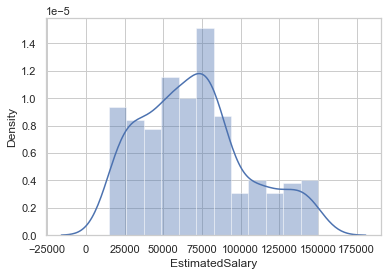

In [24]:
sns.distplot(df.EstimatedSalary)

<AxesSubplot:xlabel='EstimatedSalary'>

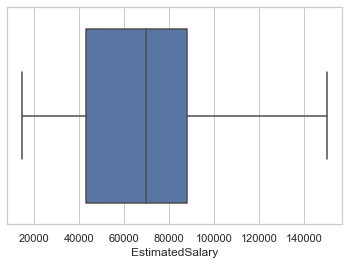

In [26]:
sns.boxplot(df.EstimatedSalary)

In [27]:
df.groupby(df.EstimatedSalary).mean()

,User ID,Age,Purchased
EstimatedSalary,,,
15000,15722905.50,28.250000,0.0
16000,15629514.00,23.500000,0.0
17000,15714100.00,27.666667,0.0
18000,15652601.25,29.250000,0.0
19000,15652135.00,21.500000,0.0
...,...,...,...
146000,15653190.50,44.000000,1.0
147000,15794253.00,35.000000,1.0
148000,15789815.00,29.000000,1.0


#### People with high average salary and high age tends to buy the product more.

In [38]:
corr,_ = pearsonr(df.EstimatedSalary, df.Purchased)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.362


## 3. Gender

In [30]:
df.Gender

0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: object

In [31]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [32]:
df.groupby(df.Gender).mean()

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
Female,1.569331e+07,38.411765,71759.803922,0.377451
Male,1.568970e+07,36.867347,67642.857143,0.336735


Text(0.5, 1.0, 'Count of Purchased According to Job Gender')

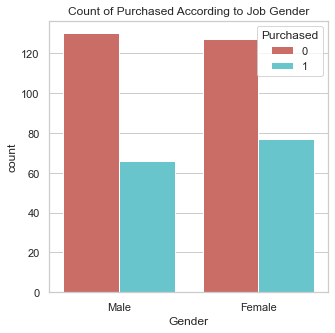

In [35]:
fig, ax = plt.subplots(figsize = (5,5)) 
sns.countplot(x=df.Gender, hue=df.Purchased, palette='hls')
plt.title('Count of Purchased According to Job Gender')

#### Females have bought the product more than male.

In [36]:
cross = pd.crosstab(df.Gender, df.Purchased)
cross

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [37]:
chi2_contingency(cross, correction=False)

(0.7214618861612265,
 0.3956648022875966,
 1,
 array([[131.07,  72.93],
        [125.93,  70.07]]))

### P-Value greater than 0.05 hence a bad predictor.

## Model Building

In [28]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [29]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [39]:
df.drop(columns=['User ID', 'Gender'], axis=1, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


# Resampling Using Smote

In [43]:
X = df.loc[:, df.columns != 'Purchased']
y = df.loc[:, df.columns == 'Purchased']

os = SMOTE(random_state=0)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Purchased'])

### Checking the count of data

In [47]:
print("length of oversampled data is ",len(os_data_X))
print("Number of Product Not Bought in oversampled data",len(os_data_y[os_data_y['Purchased']==0]))
print("Number of product Bought",len(os_data_y[os_data_y['Purchased']==1]))
print("Proportion of not bought data in oversampled data is ",len(os_data_y[os_data_y['Purchased']==0])/len(os_data_X))
print("Proportion of bought data in oversampled data is ",len(os_data_y[os_data_y['Purchased']==1])/len(os_data_X))

length of oversampled data is  356
Number of Product Not Bought in oversampled data 178
Number of product Bought 178
Proportion of not bought data in oversampled data is  0.5
Proportion of bought data in oversampled data is  0.5


In [48]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [49]:
cols=['Age', 'EstimatedSalary'] 
X=os_data_X[cols]
y=os_data_y['Purchased']

In [50]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.677765
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.022     
Dependent Variable: Purchased        AIC:              486.5684  
Date:               2022-01-10 15:13 BIC:              494.3183  
No. Observations:   356              Log-Likelihood:   -241.28   
Df Model:           1                LL-Null:          -246.76   
Df Residuals:       354              LLR p-value:      0.00093484
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
-----------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------
Age                -0.0007   0.0055 -0.1297 0.8968 -0.0115 0.0101
EstimatedSalary     0.0000   0.0000  1.6873 0.0915 -0.0000 0.0000


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.49


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 0 55]
 [ 0 52]]


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.49      1.00      0.65        52

    accuracy                           0.49       107
   macro avg       0.24      0.50      0.33       107
weighted avg       0.24      0.49      0.32       107



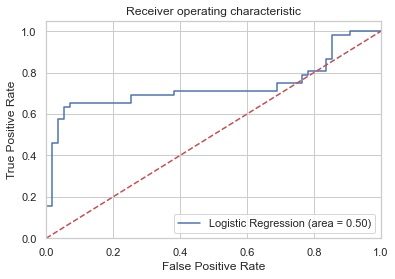

In [55]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Model 2

In [56]:
df = pd.read_csv(r'D:\Uddhav\DATA SCIENCE\ML PROJECTS\Logistic regression\Subscription Purchased or not\Social_Network_ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [57]:
df.drop(columns=['User ID'], axis=1, inplace=True)

## Creating Dummy Variables

In [58]:
cat_vars=['Gender']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data=df.join(cat_list)
    df=data

In [59]:
cat_vars=['Gender']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [62]:
df=df[to_keep]
df.columns.values

array(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Female',
       'Gender_Male'], dtype=object)

# Resampling Using Smote

In [63]:
X = df.loc[:, df.columns != 'Purchased']
y = df.loc[:, df.columns == 'Purchased']

os = SMOTE(random_state=0)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Purchased'])

In [65]:
print("length of oversampled data is ",len(os_data_X))
print("Number of Product Not Bought in oversampled data",len(os_data_y[os_data_y['Purchased']==0]))
print("Number of product Bought",len(os_data_y[os_data_y['Purchased']==1]))
print("Proportion of not bought data in oversampled data is ",len(os_data_y[os_data_y['Purchased']==0])/len(os_data_X))
print("Proportion of bought data in oversampled data is ",len(os_data_y[os_data_y['Purchased']==1])/len(os_data_X))

length of oversampled data is  356
Number of Product Not Bought in oversampled data 178
Number of product Bought 178
Proportion of not bought data in oversampled data is  0.5
Proportion of bought data in oversampled data is  0.5


In [68]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Female', 'Gender_Male'], dtype='object')

In [69]:
cols=['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male'] 
X=os_data_X[cols]
y=os_data_y['Purchased']

In [70]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.330834
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.523     
Dependent Variable: Purchased        AIC:              243.5536  
Date:               2022-01-10 15:20 BIC:              259.0534  
No. Observations:   356              Log-Likelihood:   -117.78   
Df Model:           3                LL-Null:          -246.76   
Df Residuals:       352              LLR p-value:      1.2375e-55
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-----------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------
Age               0.2461   0.0305  8.0802 0.0000   0.1864  0.3058
EstimatedSalary   0.0000   0.0000  6.2779 0.0000   0.0000  0.0000


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [72]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.49


In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 0 55]
 [ 0 52]]


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.49      1.00      0.65        52

    accuracy                           0.49       107
   macro avg       0.24      0.50      0.33       107
weighted avg       0.24      0.49      0.32       107



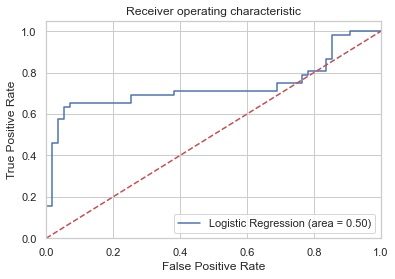

In [76]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Model 3 : Using Newton-CG Solver

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver = 'newton-cg', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='newton-cg')

### Accuracy Of Model

In [78]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


### Confusion Matrix

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[42 13]
 [ 7 45]]


### F1 Score

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        55
           1       0.78      0.87      0.82        52

    accuracy                           0.81       107
   macro avg       0.82      0.81      0.81       107
weighted avg       0.82      0.81      0.81       107



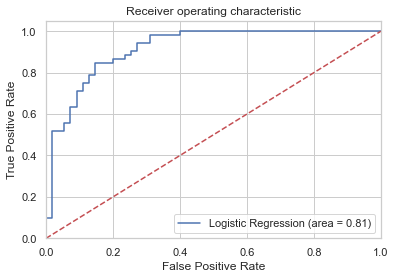

In [81]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Model 4 : Using ( liblinear ) Solver

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver = 'liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [83]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.49


In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 0 55]
 [ 0 52]]


In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.49      1.00      0.65        52

    accuracy                           0.49       107
   macro avg       0.24      0.50      0.33       107
weighted avg       0.24      0.49      0.32       107



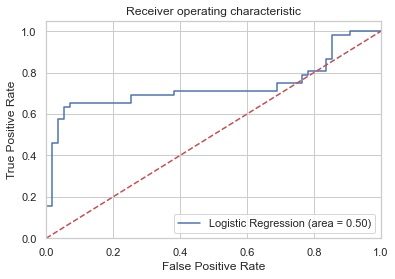

In [86]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Model 5 : Using ( sag ) Solver

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver = 'sag', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='sag')

In [88]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.49


In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 0 55]
 [ 0 52]]


In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.49      1.00      0.65        52

    accuracy                           0.49       107
   macro avg       0.24      0.50      0.33       107
weighted avg       0.24      0.49      0.32       107



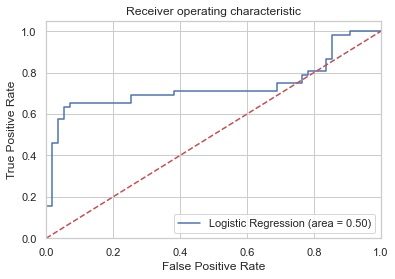

In [92]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Model 6 : Using ( saga ) Solver

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver = 'saga', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='saga')

In [96]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.49


In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 0 55]
 [ 0 52]]


In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.49      1.00      0.65        52

    accuracy                           0.49       107
   macro avg       0.24      0.50      0.33       107
weighted avg       0.24      0.49      0.32       107



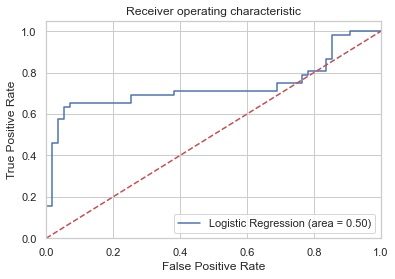

In [99]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# On Comparison with all solvers we will choose the model with Newton-cg solver as it gave us the best accuracy and F1 score with good Tpr and Fpr ratio.